# Climate Change Belief Analysis
Rabelani Tshidavhu

# Problem Statement
Build a machine learning model that will predict an indivudual's belief on climate change.

# Importing libraries

In [1]:
!pip install emoji 

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
!pip install demoji

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd
import re
import string
import emoji as emoj
import demoji
import nltk
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
#import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Importing data

In [4]:
#import the train data
train_df = pd.read_csv('../input/climate-change-edsa2020-21/train.csv')
train_df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [5]:
#import the test data
test_df = pd.read_csv('../input/climate-change-edsa2020-21/test.csv')
test_df.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


# Text cleaning

## clean text: remove emojis 

In [6]:
#Make a copy of train and test data
cleaned_train_df = train_df.copy()
cleaned_test_df = test_df.copy()

In [7]:
def extra_all_the_emoji(strings):
    """This function extracts the emojis for every row in the dataframe"""
    return ''.join(character for character in strings if character in emoj.UNICODE_EMOJI)

In [8]:
#apply the extra_all_the_emoji function to the message column (train data)
cleaned_train_df['emojis'] = cleaned_train_df['message'].apply(extra_all_the_emoji)
cleaned_train_df[cleaned_train_df['emojis'] != '']['emojis']

56       😂❄❄🤦♂
121          🤔
209       😂🔥🌎❄
230          ♂
488         🙄🙄
         ...  
15506        ⬆
15669        😠
15671        😄
15695        ⚡
15723        😨
Name: emojis, Length: 182, dtype: object

In [9]:
cleaned_train_df.head()

,sentiment,message,tweetid,emojis
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,
1,1,It's not like we lack evidence of anthropogeni...,126103,
2,2,RT @RawStory: Researchers say we have three ye...,698562,
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,


In [10]:
#apply the extra_all_the_emoji function to the message column (test data)
cleaned_test_df['emojis'] = cleaned_test_df['message'].apply(extra_all_the_emoji)
cleaned_test_df[cleaned_test_df['emojis'] != '']['emojis']

98              😔
121             ™
133             ™
146           🤷🏻♀
177      🐼🐻🐝🐠🐚🌷🍀🌎
           ...   
10199           ⚡
10261           ™
10316         ❄❄❄
10378          ▶▶
10480          👍🏼
Name: emojis, Length: 120, dtype: object

In [11]:
#The list of all emojis in the train data
list_of_emojis_train =cleaned_train_df[cleaned_train_df['emojis'] != '']['emojis'].tolist()

In [12]:
list_of_emojis_train

['😂❄❄🤦♂',
 '🤔',
 '😂🔥🌎❄',
 '♂',
 '🙄🙄',
 '✊',
 '😂😂',
 '🙃',
 '😑❄',
 '™',
 '🤔',
 '😳😳😳🙄🙄',
 '❄',
 '🤔',
 '☔',
 '©',
 '™',
 '™',
 '⚡',
 '🤔🤔🤔',
 '😒👎🏻🌍😜🙏🏻😇',
 '👏🏽👏🏽👏🏽',
 '🌍💀',
 '🇺🇸🇺🇸🙋🏼🌎🔫🤰🏽',
 '©',
 '😂',
 '🌍',
 '™',
 '🤣',
 '🌼',
 '😂',
 '😢',
 '🚨🚨😂😂😂',
 '▶',
 '🤔',
 '♀',
 '😂',
 '😜',
 '▶',
 '➡',
 '😞',
 '⚡',
 '🔥🌏',
 '♀',
 '😴',
 '☢',
 '➡',
 '⛰',
 '❤',
 '❤',
 '🙄',
 '😂😂😂',
 '™',
 '☹',
 '😫',
 '🤔',
 '😔',
 '😩',
 '⏩',
 '😊',
 '🙄🙄',
 '😳⏰',
 '🔥🌎🔥',
 '🤗',
 '🌴🌳🌲🌻🌍🍄🌤🌱🦋🐞🐾🌈🏔',
 '🤐🤐',
 '🔥',
 '🇺🇸',
 '🔥',
 '❤',
 '😢😢😢',
 '🙁',
 '™',
 '🙄🙄',
 '♥',
 '🔥🔥🔥',
 '🇺🇸🇺🇸',
 '😄',
 '🎵🎵',
 '❤',
 '🏊🙃',
 '☝',
 '😂',
 '♋',
 '💍',
 '☀',
 '🙃',
 '😂',
 '™',
 '🔥🌍👌',
 '🤡',
 '™',
 '👀👍🏼',
 '🖐',
 '👑🌍❤',
 '😳',
 '😎',
 '™',
 '▶',
 '😂😂😂😂',
 '📝',
 '😁😁',
 '☎',
 '🙄',
 '⬅',
 '🌎',
 '♂☕',
 '➡',
 '❤',
 '❤🌎',
 '™',
 '😅',
 '🌏',
 '🇨🇦❄☀',
 '😍',
 '‼‼',
 '🦄',
 '✅',
 '📢',
 '💀',
 '😒',
 '♀',
 '😲😖😔😲',
 '➡',
 '☀',
 '😬',
 '❄',
 '➡',
 '™',
 '✈✈',
 '🙂',
 '➡',
 '💀💀💀',
 '🐝',
 '❤',
 '🙃',
 '😂',
 '😂',
 '🤔',
 '😂',
 '☄☁',
 '♥',
 '😩',
 '🙄',
 '💅🏽',
 '😅',
 '✨',
 '🤣🤣',
 '⏳',
 '✔✔✔✔',

In [13]:
#The list of all emojis in the test data
list_of_emojis_test =cleaned_test_df[cleaned_test_df['emojis'] != '']['emojis'].tolist()

In [14]:
list_of_emojis_test

['😔',
 '™',
 '™',
 '🤷🏻♀',
 '🐼🐻🐝🐠🐚🌷🍀🌎',
 '👇👇',
 '❄',
 '😂😂',
 '👇👇👇',
 '▶',
 '☎',
 '😕',
 '😂',
 '😂',
 '♥',
 '🙄',
 '😂😂',
 '➡',
 '😂',
 '™',
 '🎉🤔😂😂',
 '🤔',
 '👍',
 '™',
 '😏',
 '☝',
 '❓❓❓❓❓',
 '😬',
 '➡',
 '😂',
 '😅😆',
 '😂',
 '©',
 '▶',
 '✌',
 '😍😍😍😍😍',
 '☄⛱',
 '™',
 '⚡',
 '🔥🙊',
 '🤣🤣🤣',
 '⬆➡⬆➡⬆',
 '™',
 '😅🌏',
 '😞',
 '😂😂😂😂😂😂',
 '👀',
 '▶',
 '😊😊😊😊😊😊',
 '😔',
 '👊🏻🖕🏻',
 '💁',
 '❌❌❌',
 '⛷',
 '😂😂',
 '☝',
 '😍😍😫😫😫💯💯👌🏽',
 '♂',
 '☁☁',
 '📽',
 '❄',
 '🤗',
 '♥',
 '👏',
 '📷',
 '🙄',
 '😝😛😛',
 '™',
 '⚡',
 '😡',
 '😂',
 '⚡',
 '😟',
 '➡',
 '➡',
 '➡',
 '™',
 '💩',
 '🙄',
 '✈',
 '♥',
 '⚖',
 '🔥☀🔥',
 '🤦🏼♂',
 '🐸☕',
 '👇🏽👇🏽👇🏽👇🏽👇🏽👇🏽',
 '😜😜',
 '™©',
 '🤔',
 '😍',
 '🔀',
 '♂',
 '🤔',
 '🎅🏿',
 '🤔😂',
 '♥',
 '‼',
 '🙄',
 '➡',
 '😁😁😂😂',
 '™',
 '😳',
 '😮',
 '▶',
 '♥',
 '😳',
 '🙈',
 '😍',
 '😀',
 '☺',
 '😃',
 '😉',
 '❤',
 '😂😂😂',
 '💚',
 '⚡',
 '™',
 '❄❄❄',
 '▶▶',
 '👍🏼']

In [15]:
#loop through the whole list to change every emoji to text in the train data
changed_emoji_to_text_train = []
for emojis in list_of_emojis_train:
    changed_emoji_to_text_train.append(emoj.demojize(emojis, delimiters=("", "")))
changed_emoji_to_text_train 

['face_with_tears_of_joysnowflakesnowflakeperson_facepalmingmale_sign',
 'thinking_face',
 'face_with_tears_of_joyfireglobe_showing_Americassnowflake',
 'male_sign',
 'face_with_rolling_eyesface_with_rolling_eyes',
 'raised_fist',
 'face_with_tears_of_joyface_with_tears_of_joy',
 'upside-down_face',
 'expressionless_facesnowflake',
 'trade_mark',
 'thinking_face',
 'flushed_faceflushed_faceflushed_faceface_with_rolling_eyesface_with_rolling_eyes',
 'snowflake',
 'thinking_face',
 'umbrella_with_rain_drops',
 'copyright',
 'trade_mark',
 'trade_mark',
 'high_voltage',
 'thinking_facethinking_facethinking_face',
 'unamused_facethumbs_down_light_skin_toneglobe_showing_Europe-Africawinking_face_with_tonguefolded_hands_light_skin_tonesmiling_face_with_halo',
 'clapping_hands_medium_skin_toneclapping_hands_medium_skin_toneclapping_hands_medium_skin_tone',
 'globe_showing_Europe-Africaskull',
 'United_StatesUnited_Statesperson_raising_hand_medium-light_skin_toneglobe_showing_Americaspistolpre

In [16]:
#loop through the whole list to change every emoji to text in the test data
changed_emoji_to_text_test = []
for emojis in list_of_emojis_test:
    changed_emoji_to_text_test.append(emoj.demojize(emojis, delimiters=("", "")))
changed_emoji_to_text_test

['pensive_face',
 'trade_mark',
 'trade_mark',
 'person_shrugging_light_skin_tonefemale_sign',
 'panda_facebear_facehoneybeetropical_fishspiral_shelltulipfour_leaf_cloverglobe_showing_Americas',
 'backhand_index_pointing_downbackhand_index_pointing_down',
 'snowflake',
 'face_with_tears_of_joyface_with_tears_of_joy',
 'backhand_index_pointing_downbackhand_index_pointing_downbackhand_index_pointing_down',
 'play_button',
 'telephone',
 'confused_face',
 'face_with_tears_of_joy',
 'face_with_tears_of_joy',
 'heart_suit',
 'face_with_rolling_eyes',
 'face_with_tears_of_joyface_with_tears_of_joy',
 'right_arrow',
 'face_with_tears_of_joy',
 'trade_mark',
 'party_popperthinking_faceface_with_tears_of_joyface_with_tears_of_joy',
 'thinking_face',
 'thumbs_up',
 'trade_mark',
 'smirking_face',
 'index_pointing_up',
 'question_markquestion_markquestion_markquestion_markquestion_mark',
 'grimacing_face',
 'right_arrow',
 'face_with_tears_of_joy',
 'grinning_face_with_sweatgrinning_squinting_fac

In [17]:
def emojis_to_text(text):
    """This function changes all the emojis in the message column into words"""
    return emoj.demojize(text, delimiters=("", ""))
cleaned_train_df['message'] = cleaned_train_df['message'].apply(emojis_to_text)
cleaned_test_df['message'] = cleaned_test_df['message'].apply(emojis_to_text)

In [18]:
cleaned_train_df.head()

,sentiment,message,tweetid,emojis
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,
1,1,It's not like we lack evidence of anthropogeni...,126103,
2,2,RT @RawStory: Researchers say we have three ye...,698562,
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,


## clean text
*   make text lowercase
*   remove:text in square brackets, url links, punctuations,numbers

In [19]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = text.replace('rt','')
    return text

In [20]:
#cleaning the train data using above function
cleaned_train_df['message'] = train_df['message'].apply(lambda x:clean_text(x))
cleaned_train_df.head()

,sentiment,message,tweetid,emojis
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,
1,1,its not like we lack evidence of anthropogenic...,126103,
2,2,rawstory researchers say we have three years ...,698562,
3,1,todayinmaker wired was a pivotal year in the...,573736,
4,1,soynoviodetodas its and a racist sexist clim...,466954,


In [21]:
#cleaning the test data using above function
cleaned_test_df['message'] = test_df['message'].apply(lambda x:clean_text(x))
cleaned_test_df.head()

,message,tweetid,emojis
0,europe will now be looking to china to make su...,169760,
1,combine this with the polling of staffers re c...,35326,
2,the scary unimpeachable evidence that climate ...,224985,
3,karoli morgfair osborneink dailykos putin got ...,476263,
4,fakewillmoore female orgasms cause global war...,872928,


# Text feature extraction unbalanced class

In [22]:
#select the response variable
y = cleaned_train_df['sentiment']

#vectorise the message column (features)
vectorizer = TfidfVectorizer(ngram_range=(1,3),min_df=2)
temp = cleaned_train_df.append(cleaned_test_df, ignore_index=True)
temp_vect = vectorizer.fit_transform(temp['message'])
X_vectorized = temp_vect[:15819,:]
test_vect1 = temp_vect[15819:,:]

#test_train split: unbalanced data
X_train, X_test, y_train, y_test = train_test_split(X_vectorized,y, test_size=0.1, random_state=27)

# Balance class

In [23]:
# Separate minority and majority classes
neg_one = cleaned_train_df[cleaned_train_df['sentiment']==-1]
zero = cleaned_train_df[cleaned_train_df['sentiment']==0]
one = cleaned_train_df[cleaned_train_df['sentiment']==1]
two= cleaned_train_df[cleaned_train_df['sentiment']==2]

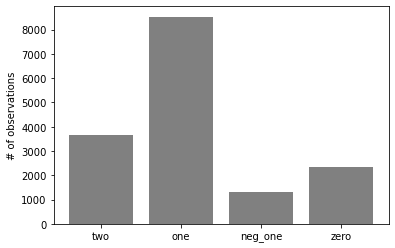

In [24]:
# Get all possible labels

labels = cleaned_train_df['sentiment'].unique()
heights = [len(neg_one),len(zero),len(one),len(two)]
plt.bar(labels,heights,color='grey')
plt.xticks(labels,['neg_one','zero','one','two'])
plt.ylabel("# of observations")
plt.show()

Notice that there is a class imbalance in the data set. The next steps will balance the class by upsampling the minority and down sample the majority classes

In [25]:
#pick a class size of roughly half the size of the largest size
class_size = 4265
# Upsample minority class
two_upsampled = resample(two,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=class_size, # match number in class size
                          random_state=27) # reproducible results

neg_one_upsampled = resample(neg_one,
                          replace=True, 
                          n_samples=class_size, 
                          random_state=27) 

zero_upsampled = resample(zero,
                          replace=True, 
                          n_samples=class_size,
                          random_state=27)

#downsample majority class
one_downsampled = resample(one,
                          replace=False, # sample without replacement (no need to duplicate observations)
                          n_samples=class_size, # match number in class size
                          random_state=27) # reproducible results

# Combine upsampled minority class with downsampled majority class
sampled = pd.concat([two_upsampled, neg_one_upsampled,zero_upsampled,one_downsampled])

# Check new class counts
sampled['sentiment'].value_counts()

-1    4265
 2    4265
 1    4265
 0    4265
Name: sentiment, dtype: int64

#Text feature extraction from balanced data

In [26]:
#select the response variable
y_resampled = sampled['sentiment']

#vectorize data
temp_sam = sampled.append(cleaned_test_df, ignore_index=True)
temp_sam_vect = vectorizer.fit_transform(temp_sam['message'])
X_resampled_vect = temp_sam_vect[:17060,:]
test_vect2 = temp_sam_vect[17060:,:]

#test_train split: balanced data
X_train_sam, X_test_sam, y_train_sam, y_test_sam = train_test_split(X_resampled_vect,y_resampled, test_size=0.1, random_state=27)

# Training and evaluating the model

The following classification algorithms we selected:

*   Random forest
*   linear support vector

*   K-Nearest Neighbours 

Each algorithm was trained on balnced and unbalanced data followed by grid search to find the best hyperparameters 






## Random forest classifier

In [27]:
rfc1 = RandomForestClassifier(n_estimators=200,random_state=27)
rfc2 = RandomForestClassifier(n_estimators=200,random_state=27)

#fitting unbalanced data
rfc1.fit(X_train, y_train)
rfc_pred1 = rfc1.predict(X_test)
rfc_score1 = f1_score(y_test, rfc_pred1, average='macro')

#fitting balanced data
rfc2.fit(X_train_sam, y_train_sam)
rfc_pred2 = rfc2.predict(X_test_sam)
rfc_score2 = f1_score(y_test_sam, rfc_pred2, average='macro')

print("Testing: Random Forest")
print('F1 Score on unbalanced data: ', rfc_score1)
print('F1 Score on balanced data: ', rfc_score2)

Testing: Random Forest
F1 Score on unbalanced data:  0.5577574837443258
F1 Score on balanced data:  0.8947579923375256


### Random forest grid search: **unbalanced data**




In [28]:
#Create Scorer
f1 = make_scorer(f1_score , average='macro')
 
# create the grid
n_estimators = [100, 1000, 2000]
max_features = [1, 3, 5]
max_depth = [5, 10, 20]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

# search the grid
grid_rfc = GridSearchCV(estimator=rfc1, 
                    param_grid=param_grid,
                    scoring = f1,
                    cv= 2,
                    verbose=2,
                    n_jobs=-1)


rfc_best = grid_rfc.fit(X_train, y_train)
rfc_estimator = grid_rfc.best_estimator_
rfc_parameters = grid_rfc.best_params_
rfc_score = grid_rfc.best_score_

print('Random Forest on Unbalanced Data')
print('Best Estimator: ', rfc_estimator)
print('Best Parameter: ', rfc_parameters)
print('Best Score: ', rfc_score)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  3.1min finished


Random Forest on Unbalanced Data
Best Estimator:  RandomForestClassifier(max_depth=20, n_estimators=2000, random_state=27)
Best Parameter:  {'max_depth': 20, 'n_estimators': 2000}
Best Score:  0.22619654459834418


### Random forest grid search: **balanced data**

In [29]:
#random forest grid search for ballanced data
#Create Scorer

f1 = make_scorer(f1_score , average='macro')
 
# create the grid
n_estimators = [100, 1000, 2000]
max_features = [1, 3, 5]
max_depth = [5, 10, 20]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)


# search the grid
grid_rfc = GridSearchCV(estimator=rfc2, 
                    param_grid=param_grid,
                    scoring = f1,
                    cv= 2,
                    verbose=2,
                    n_jobs=-1)


rfc_best = grid_rfc.fit(X_train_sam, y_train_sam)
rfc_estimator = grid_rfc.best_estimator_
rfc_parameters = grid_rfc.best_params_
rfc_score = grid_rfc.best_score_

print('Random Forest on balanced Data')
print('Best Estimator: ', rfc_estimator)
print('Best Parameter: ', rfc_parameters)
print('Best Score: ', rfc_score)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  3.7min finished


Random Forest on balanced Data
Best Estimator:  RandomForestClassifier(max_depth=20, n_estimators=2000, random_state=27)
Best Parameter:  {'max_depth': 20, 'n_estimators': 2000}
Best Score:  0.7026808202666928


## K-Nearest Neighbours

In [30]:
knn1 = KNeighborsClassifier()
knn2 = KNeighborsClassifier()

#fitting unballanced data
knn1.fit(X_train, y_train)
knn_pred1 = knn1.predict(X_test)
knn_score1 = f1_score(y_test, knn_pred1, average='macro')

#fitting unballanced data
knn2.fit(X_train_sam, y_train_sam)
knn_pred2 = knn2.predict(X_test_sam)
knn_score2 = f1_score(y_test_sam, knn_pred2, average='macro')

print("Testing: K-Nearest Neighbours")
print('F1 Score on unbalanced data: ', knn_score1)
print('F1 Score on balanced data: ', knn_score2)

Testing: K-Nearest Neighbours
F1 Score on unbalanced data:  0.5114107143588685
F1 Score on balanced data:  0.7381208601819075


### knn grid search: **unbalanced data**

In [31]:
#grid search for unballanced data

f1 = make_scorer(f1_score , average='macro')

n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100]
param_grid = {'n_neighbors': n_neighbors}
grid_knn = GridSearchCV(estimator = knn1,
                        param_grid = param_grid,
                        scoring= f1,
                        cv = 2,
                        n_jobs = -1)
knn_best = grid_knn.fit(X_train, y_train)
knn_estimator = grid_knn.best_estimator_
knn_parameters = grid_knn.best_params_
knn_score = grid_knn.best_score_

print('K-Nearest Neighbours on unbalanced Data')
print('Best Estimator: ', knn_estimator)
print('Best Parameter: ', knn_parameters)
print('Best Score: ', knn_score)

K-Nearest Neighbours on unbalanced Data
Best Estimator:  KNeighborsClassifier(n_neighbors=7)
Best Parameter:  {'n_neighbors': 7}
Best Score:  0.5101479316774311


### knn grid search: **balanced data**

In [32]:
#grid search for ballanced data

f1 = make_scorer(f1_score , average='macro')

n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100]
param_grid = {'n_neighbors': n_neighbors}
grid_knn = GridSearchCV(estimator = knn2,
                        param_grid = param_grid,
                        scoring=f1,
                        cv = 2,
                        n_jobs = -1)

knn_best = grid_knn.fit(X_train_sam, y_train_sam)
knn_estimator = grid_knn.best_estimator_
knn_parameters = grid_knn.best_params_
knn_score = grid_knn.best_score_

print('K-Nearest Neighbours on Balanced Data')
print('Best Estimator: ', knn_estimator)
print('Best Parameter: ', knn_parameters)
print('Best Score: ', knn_score)

K-Nearest Neighbours on Balanced Data
Best Estimator:  KNeighborsClassifier(n_neighbors=1)
Best Parameter:  {'n_neighbors': 1}
Best Score:  0.761428492973194


## Linear Support Vector Classifier

In [33]:
from sklearn.svm import LinearSVC
lsvc1 = LinearSVC()
lsvc2 = LinearSVC()

#Fitting to Unbalanced data
lsvc1.fit(X_train,y_train)
lsvc_pred1 = lsvc1.predict(X_test)
lsvc_score1 = f1_score(y_test, lsvc_pred1, average='macro')

#Fitting to Balanced data
lsvc2.fit(X_train_sam,y_train_sam)
lsvc_pred2 = lsvc2.predict(X_test_sam)
lsvc_score2 = f1_score(y_test_sam, lsvc_pred2, average='macro')

print("Testing: Linear Support Vector")
print('F1 Score on unbalanced data', lsvc_score1)
print('F1 Score on balanced data', lsvc_score2)

Testing: Linear Support Vector
F1 Score on unbalanced data 0.6752269842496742
F1 Score on balanced data 0.8940058059593669


### Linear Support Vector Classifier grid search: **unbalance data**

In [34]:
#grid search for unbalanced data
f1 = make_scorer(f1_score , average='macro')

# create the grid
max_iter = [100,200,300,500,1000,]
C = [1,10,50,100]
param_grid = dict(C =C ,max_iter=max_iter)


# search the grid
grid_lsvc = GridSearchCV(estimator=lsvc1, 
                    param_grid=param_grid,
                    scoring = f1,
                    cv= 2,
                    verbose=0,
                    n_jobs=-1)


lsvc_best = grid_lsvc.fit(X_train, y_train)
lsvc_estimator1 = grid_lsvc.best_estimator_
lsvc_parameters = grid_lsvc.best_params_
lsvc_score = grid_lsvc.best_score_

print('Linear Support Vector on Unbalanced Data')
print('Best Estimator: ', lsvc_estimator1)
print('Best Parameter: ', lsvc_parameters)
print('Best Score: ', lsvc_score)

Linear Support Vector on Unbalanced Data
Best Estimator:  LinearSVC(C=100, max_iter=100)
Best Parameter:  {'C': 100, 'max_iter': 100}
Best Score:  0.6108387226835308


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Linear Support Vector Classifier grid search: **balance data**

In [35]:
#grid search for balanced data
f1 = make_scorer(f1_score , average='macro')

# create the grid
max_iter = [100,200,300,500,1000]
C = [1,10,50,100,200]
param_grid = dict(C =C ,max_iter=max_iter)


# search the grid
grid_lsvc = GridSearchCV(estimator=lsvc2, 
                    param_grid=param_grid,
                    scoring = f1,
                    cv= 2,
                    verbose=0,
                    n_jobs=-1)


lsvc_best = grid_lsvc.fit(X_train_sam, y_train_sam)
lsvc_estimator2 = grid_lsvc.best_estimator_
lsvc_parameters = grid_lsvc.best_params_
lsvc_score = grid_lsvc.best_score_

print('Linear Support Vector on balanced Data')
print('Best Estimator: ', lsvc_estimator2)
print('Best Parameter: ', lsvc_parameters)
print('Best Score: ', lsvc_score)

Linear Support Vector on balanced Data
Best Estimator:  LinearSVC(C=1, max_iter=100)
Best Parameter:  {'C': 1, 'max_iter': 100}
Best Score:  0.8344446709357253


linear support vector classifier algorithm showed better performance compared to the other two classification algorithms. We used the linear support vector classifier to make predictions on the test data.

# Making predictions on test data

In [37]:
#unbalanced data
best_lsvc =  LinearSVC(C = 100, max_iter = 1000, penalty = 'l2')
best_lsvc.fit(X_train,y_train)
y_pred = best_lsvc.predict(test_vect1)

In [39]:
#balanced data
best_lsvc =  LinearSVC(C = 1, max_iter = 500, penalty = 'l2')
best_lsvc.fit(X_train_sam,y_train_sam)
y_pred_sam = best_lsvc.predict(test_vect2)

# Creating output csv for submission

In [38]:
#unbalanced data
test_df['sentiment'] = y_pred
test_df['sentiment'] = test_df['sentiment'].astype(int)
test_df[['tweetid','sentiment']].to_csv('submission_unbal3.csv', index=False)

In [40]:
#balanced data
test_df2 = test_df.copy()
test_df2['sentiment'] = y_pred_sam
test_df2['sentiment'] = test_df2['sentiment'].astype(int)
test_df2[['tweetid','sentiment']].to_csv('submission_bal7.csv', index=False)

# Conclusion 
Successfully build a model to predict an indivudual's belief on climate change based on twitter data. The linear support vector classifier showed best performance interms of the F1 score. Therefore this classifier was used to make predictions on the test data.